# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Agent Training

When training the environment, the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from collections import deque
from dqn_agent import Agent
# from double_dqn_agent import Agent
import matplotlib.pyplot as plt
import torch

agent = Agent(state_size=37, action_size=4, seed=0)
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_best.pth'))

def dqn(n_episodes=2000, max_t=300, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    best_mean = 0
    for i_episode in range(1, n_episodes+1):
#         state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps).astype(int)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state 
#             if reward != 0.0:
#                 print(score)
            if done:
                break 
        print("")
        print("Score: {}".format(score))
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        current_mean = np.mean(scores_window)
        if current_mean > best_mean:
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_best.pth')
            best_mean = current_mean
        if current_mean>=13.0:
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_best.pth')
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            break
    return scores

scores = dqn(4000, 300)



Score: 0.0
Episode 1	Average Score: 0.00
Score: 0.0
Episode 2	Average Score: 0.00
Score: -1.0
Episode 3	Average Score: -0.33
Score: -1.0
Episode 4	Average Score: -0.50
Score: -1.0
Episode 5	Average Score: -0.60
Score: -1.0
Episode 6	Average Score: -0.67
Score: 1.0
Episode 7	Average Score: -0.43
Score: 1.0
Episode 8	Average Score: -0.25
Score: 0.0
Episode 9	Average Score: -0.22
Score: -2.0
Episode 10	Average Score: -0.40
Score: 1.0
Episode 11	Average Score: -0.27
Score: 0.0
Episode 12	Average Score: -0.25
Score: 2.0
Episode 13	Average Score: -0.08
Score: 0.0
Episode 14	Average Score: -0.07
Score: 0.0
Episode 15	Average Score: -0.07
Score: 2.0
Episode 16	Average Score: 0.06
Score: 1.0
Episode 17	Average Score: 0.12
Score: 0.0
Episode 18	Average Score: 0.11
Score: -2.0
Episode 19	Average Score: 0.00
Score: 3.0
Episode 20	Average Score: 0.15
Score: 1.0
Episode 21	Average Score: 0.19
Score: 1.0
Episode 22	Average Score: 0.23
Score: 0.0
Episode 23	Average Score: 0.22
Score: 3.0
Episode 24	A

Episode 193	Average Score: 5.07
Score: 5.0
Episode 194	Average Score: 5.09
Score: 6.0
Episode 195	Average Score: 5.10
Score: 9.0
Episode 196	Average Score: 5.15
Score: 8.0
Episode 197	Average Score: 5.19
Score: 8.0
Episode 198	Average Score: 5.21
Score: 3.0
Episode 199	Average Score: 5.20
Score: 10.0
Episode 200	Average Score: 5.24

Score: 8.0
Episode 201	Average Score: 5.26
Score: 11.0
Episode 202	Average Score: 5.30
Score: 9.0
Episode 203	Average Score: 5.41
Score: 6.0
Episode 204	Average Score: 5.42
Score: 11.0
Episode 205	Average Score: 5.53
Score: 8.0
Episode 206	Average Score: 5.58
Score: 8.0
Episode 207	Average Score: 5.64
Score: 7.0
Episode 208	Average Score: 5.64
Score: 9.0
Episode 209	Average Score: 5.68
Score: 0.0
Episode 210	Average Score: 5.67
Score: 4.0
Episode 211	Average Score: 5.68
Score: 9.0
Episode 212	Average Score: 5.74
Score: 11.0
Episode 213	Average Score: 5.82
Score: 7.0
Episode 214	Average Score: 5.90
Score: 10.0
Episode 215	Average Score: 6.00
Score: 10.0
Epis

Episode 381	Average Score: 10.26
Score: 19.0
Episode 382	Average Score: 10.33
Score: 14.0
Episode 383	Average Score: 10.35
Score: 12.0
Episode 384	Average Score: 10.34
Score: 16.0
Episode 385	Average Score: 10.36
Score: 14.0
Episode 386	Average Score: 10.34
Score: 17.0
Episode 387	Average Score: 10.39
Score: 13.0
Episode 388	Average Score: 10.46
Score: 19.0
Episode 389	Average Score: 10.59
Score: 19.0
Episode 390	Average Score: 10.66
Score: 18.0
Episode 391	Average Score: 10.75
Score: 14.0
Episode 392	Average Score: 10.78
Score: 18.0
Episode 393	Average Score: 10.93
Score: 15.0
Episode 394	Average Score: 10.98
Score: 11.0
Episode 395	Average Score: 10.99
Score: 9.0
Episode 396	Average Score: 10.97
Score: 14.0
Episode 397	Average Score: 10.98
Score: 11.0
Episode 398	Average Score: 11.05
Score: 12.0
Episode 399	Average Score: 11.13
Score: 7.0
Episode 400	Average Score: 11.13

Score: 7.0
Episode 401	Average Score: 11.14
Score: 19.0
Episode 402	Average Score: 11.31
Score: 17.0
Episode 403	

<Figure size 640x480 with 1 Axes>

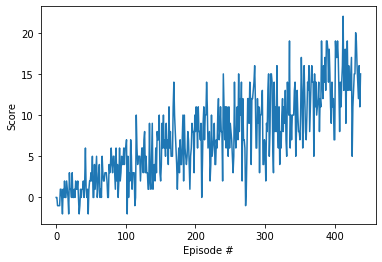

In [6]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch the agent

You can watch the trained agent collecting bananas

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

agent = Agent(state_size=37, action_size=4, seed=0)
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_best.pth'))

for j in range(300):
    action = agent.act(state).astype(int)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()